In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

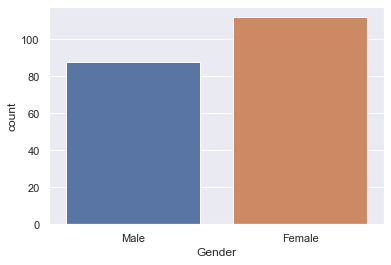

In [13]:
sns.countplot(df['Gender'])
plt.show()

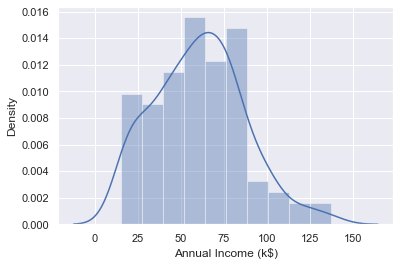

In [14]:
sns.distplot(df['Annual Income (k$)'])
plt.show()

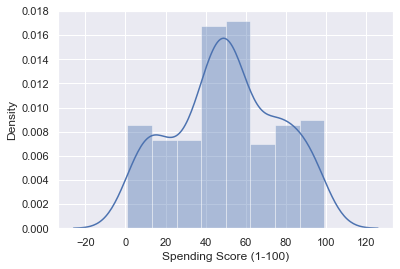

In [15]:
sns.distplot(df['Spending Score (1-100)'])
plt.show()

In [6]:
x = df.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
from sklearn.cluster import KMeans

 First value is Annual income and second value is spending score

Using WCSS - within cluster sum of sqaure

finding wcss value for diff no. of cluster

In [8]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state=1)
    km.fit(x)
    wcss.append(km.inertia_)

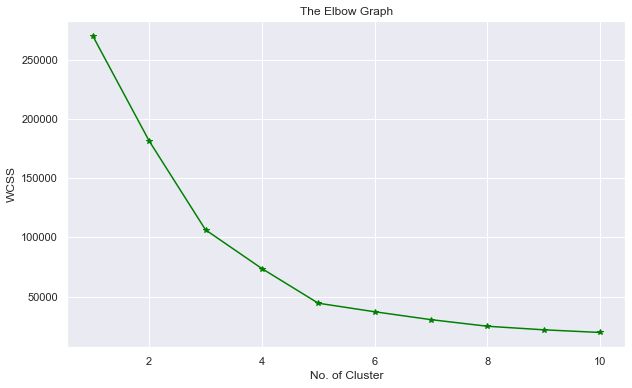

In [18]:
plt.figure(figsize=(10,6))
sns.set()
plt.plot(range(1,11),wcss,color='green',marker='*')
plt.title('The Elbow Graph')
plt.xlabel('No. of Cluster')
plt.ylabel('WCSS')
plt.show()

optimal no. of cluster = 5

In [10]:
km = KMeans(n_clusters=5,init='k-means++',random_state=1)
y = km.fit_predict(x)
print(y)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


# Visualization

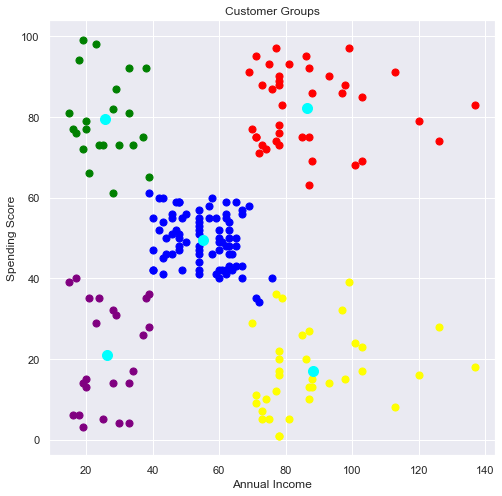

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1], s=50, c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1], s=50, c='yellow',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1], s=50, c='blue',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1], s=50, c='red',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1], s=50, c='purple',label='Cluster 5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100,c='cyan',label='centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()